**🚀 Spaceship Titanic - ML Classification Challenge**

📌 Problem Statement
The Spaceship Titanic encountered a mysterious event, and some passengers were transported to an alternate dimension. Based on passenger features, our task is to predict whether a passenger was transported (Transported = True) or not.

In [2]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Initial Exploratory data anlayis/Data description**

1.   List item
2.   List item



In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
for i in train_df.columns:
  print(i, train_df[i].nunique())

PassengerId 8693
HomePlanet 3
CryoSleep 2
Cabin 6560
Destination 3
Age 80
VIP 2
RoomService 1273
FoodCourt 1507
ShoppingMall 1115
Spa 1327
VRDeck 1306
Name 8473
Transported 2


🧹 Data Preprocessing
Handled missing values using domain-aware strategies (like mode/median filling).

Extracted additional features:

Cabin Splits: Deck, Number, Side.

Group Size: Derived from shared Passenger ID prefixes.

Converted categorical features using label encoding and one-hot encoding.

Normalized or left numerical features depending on distribution.



In [8]:
# Calculate null value counts
null_counts = train_df.isnull().sum()
null_percentages = (train_df.isnull().sum() / len(train_df)) * 100

# Create a DataFrame to display the results
null_info = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})

# Print the null value information
null_info

,Null Count,Null Percentage
PassengerId,0,0.000000
HomePlanet,201,2.312205
CryoSleep,217,2.496261
Cabin,199,2.289198
Destination,182,2.093639
Age,179,2.059128
VIP,203,2.335212
RoomService,181,2.082135
FoodCourt,183,2.105142
ShoppingMall,208,2.392730


/tmp/ipython-input-9-2711650748.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_5_null.index, y='Null Percentage', data=top_5_null, palette='viridis')


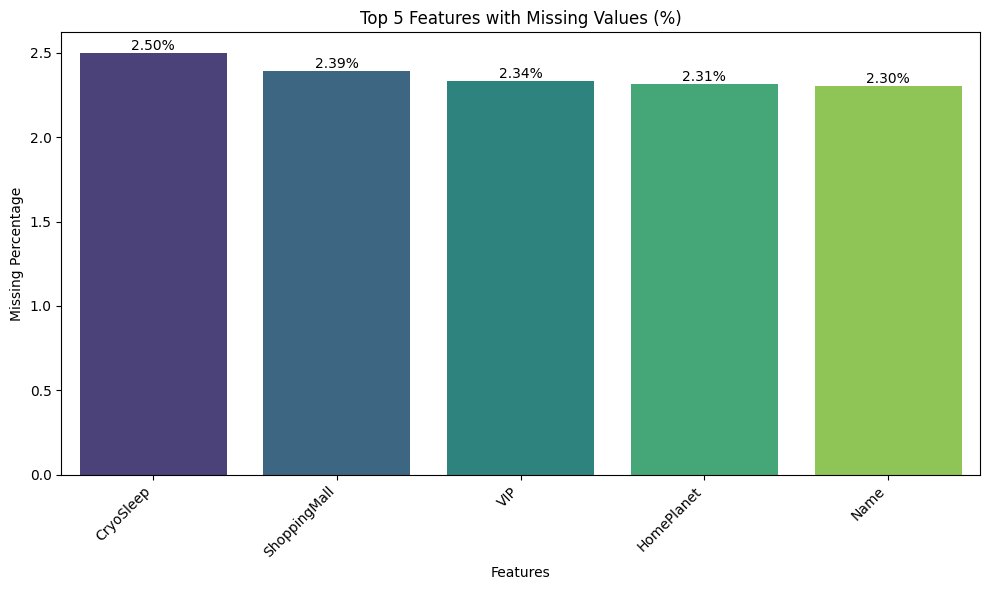

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by null percentage and get the top 5
top_5_null = null_info.sort_values(by='Null Percentage', ascending=False).head(5)

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_5_null.index, y='Null Percentage', data=top_5_null, palette='viridis')
plt.title('Top 5 Features with Missing Values (%)')
plt.xlabel('Features')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45, ha='right')

# Add percentage labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')

plt.tight_layout()
plt.show()


In [10]:
train_df[['deck', 'num', 'side']] = train_df['Cabin'].str.split('/', expand=True)
train_df = train_df.drop('Cabin', axis=1)
train_df.head()


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
 13  deck          8494 non-null   object 
 14  num           8494 non-null   object 
 15  side          8494 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


In [12]:
train_df['Transported'] = train_df['Transported'].astype(int)

In [13]:
train_df.corr(numeric_only=True)['Transported'].sort_values(ascending=False)

,Transported
Transported,1.000000
FoodCourt,0.046566
ShoppingMall,0.010141
Age,-0.075026
VRDeck,-0.207075
Spa,-0.221131
RoomService,-0.244611


In [14]:
# Drop original numeric spend and age columns
train_df = train_df.drop(['Name','PassengerId'], axis=1)


In [15]:
def missingValues(dataset):
    dataset[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService', 'Age']] = dataset[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService', 'Age']].fillna(value=0)

    dataset['deck'].fillna(value='Missing', inplace=True)
    dataset['side'].fillna(value='Missing', inplace=True)
    dataset['num'].fillna(value=-1, inplace=True)
    dataset['HomePlanet'].fillna(value='Missing', inplace=True)
    dataset['Destination'].fillna(value='Missing', inplace=True)

    dataset['CryoSleep'] = dataset['CryoSleep'].astype(int)
    dataset['VIP'] = dataset['VIP'].astype(int)
    dataset['num'] = dataset['num'].astype(int)

missingValues(train_df)

/tmp/ipython-input-15-577193859.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['deck'].fillna(value='Missing', inplace=True)
/tmp/ipython-input-15-577193859.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [16]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-18-2271705757.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Transported', palette='pastel')


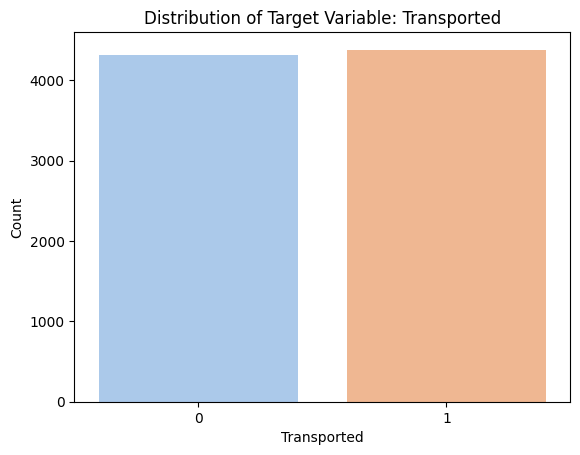

In [18]:


sns.countplot(data=train_df, x='Transported', palette='pastel')
plt.title('Distribution of Target Variable: Transported')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.show()

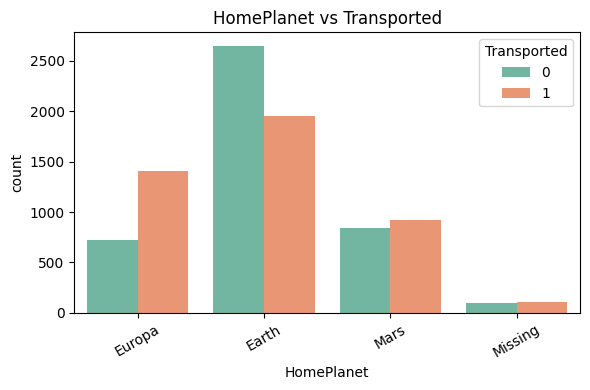

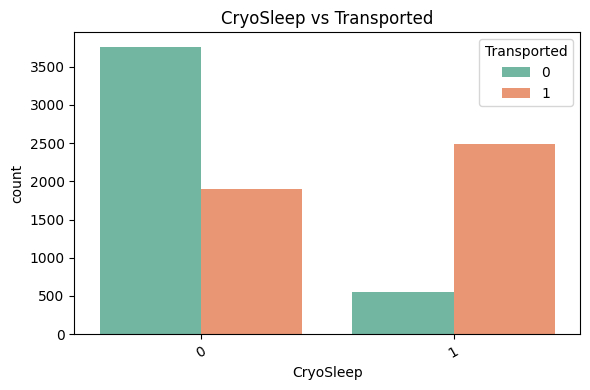

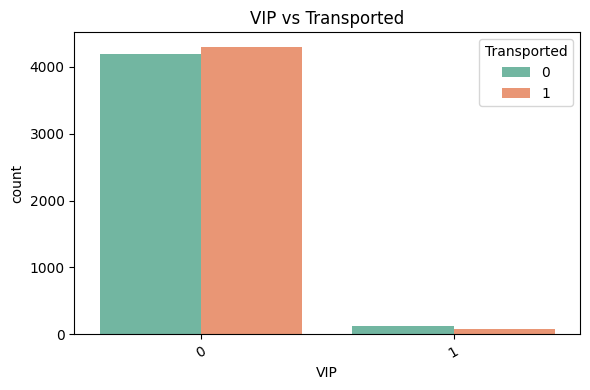

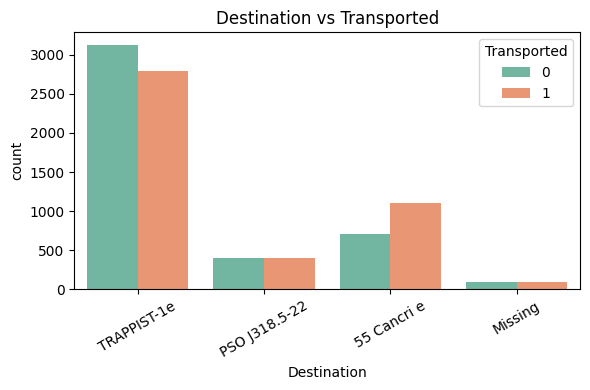

In [19]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'VIP', 'Destination']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=train_df, x=col, hue='Transported', palette='Set2')
    plt.title(f'{col} vs Transported')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

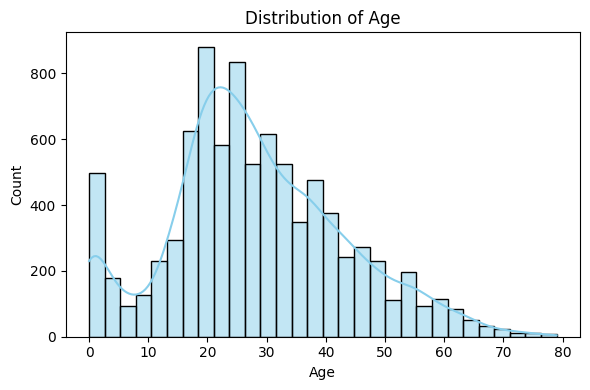

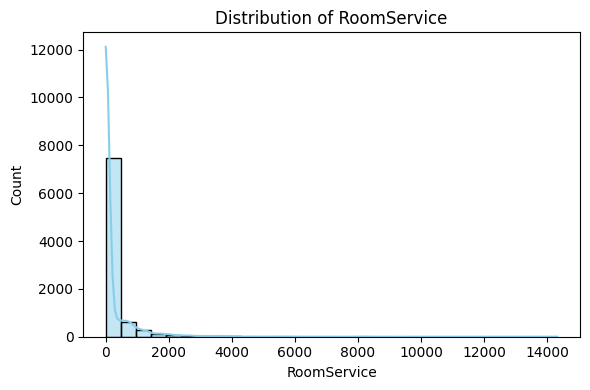

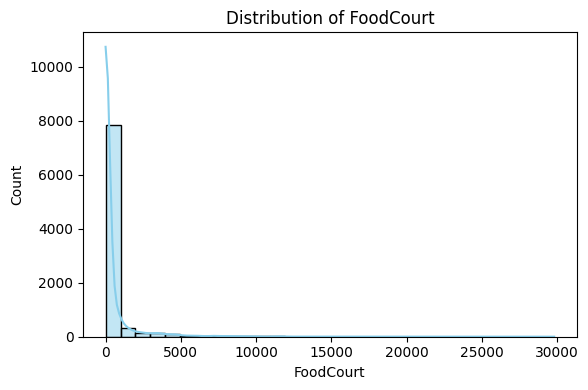

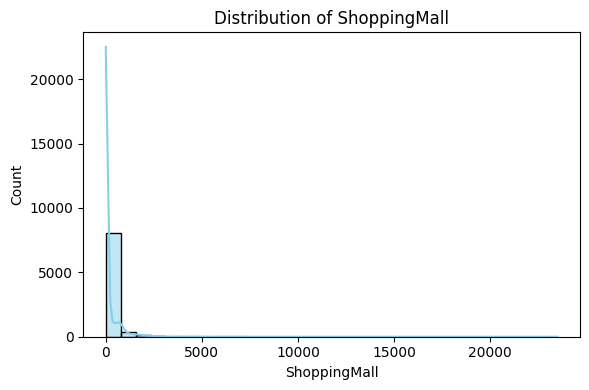

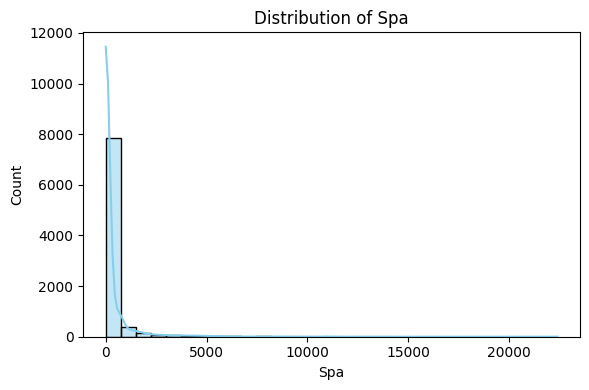

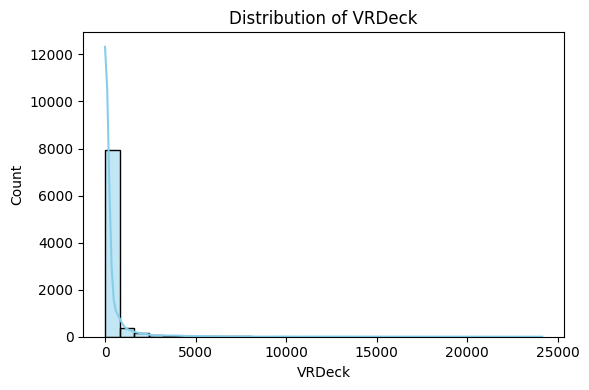

In [20]:
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=train_df, x=col, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

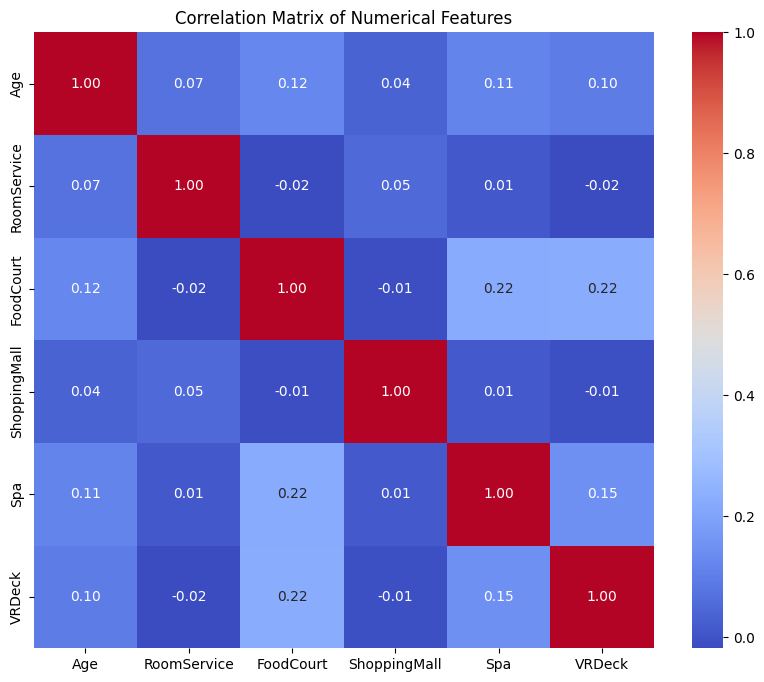

In [21]:
plt.figure(figsize=(10,8))
corr = train_df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Model Training and Tuning Used XGBoostClassifier for its excellent performance with tabular data.

Tuned hyperparameters using RandomizedSearchCV with 3-fold cross-validation:

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [23]:
train_df_encoded = train_df.copy()
label_encoders = {}

for col in train_df_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    train_df_encoded[col] = le.fit_transform(train_df_encoded[col])
    label_encoders[col] = le  # Save encoder for later (e.g., to transform test set)

In [24]:
train_df_encoded.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,1,0,3,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
1,0,0,3,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,2
2,1,0,3,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,2
3,1,0,3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,2
4,0,0,3,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,2


In [25]:
train_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
 11  deck          8693 non-null   int64  
 12  num           8693 non-null   int64  
 13  side          8693 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 950.9 KB


In [26]:
from sklearn.model_selection import train_test_split

X = train_df_encoded.drop('Transported', axis=1)
y = train_df_encoded['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Loop through models and evaluate performance
model_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    model_scores[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Display scores
import pandas as pd
pd.DataFrame(model_scores.items(), columns=["Model", "Validation Accuracy"]).sort_values(by="Validation Accuracy", ascending=False)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7706
Decision Tree Accuracy: 0.7435
Random Forest Accuracy: 0.7918
Support Vector Machine Accuracy: 0.7740
XGBoost Accuracy: 0.7849


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:59:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Validation Accuracy
2,Random Forest,0.791834
4,XGBoost,0.784934
3,Support Vector Machine,0.774008
0,Logistic Regression,0.770558
1,Decision Tree,0.743531


/tmp/ipython-input-31-1922716283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()), palette='viridis')


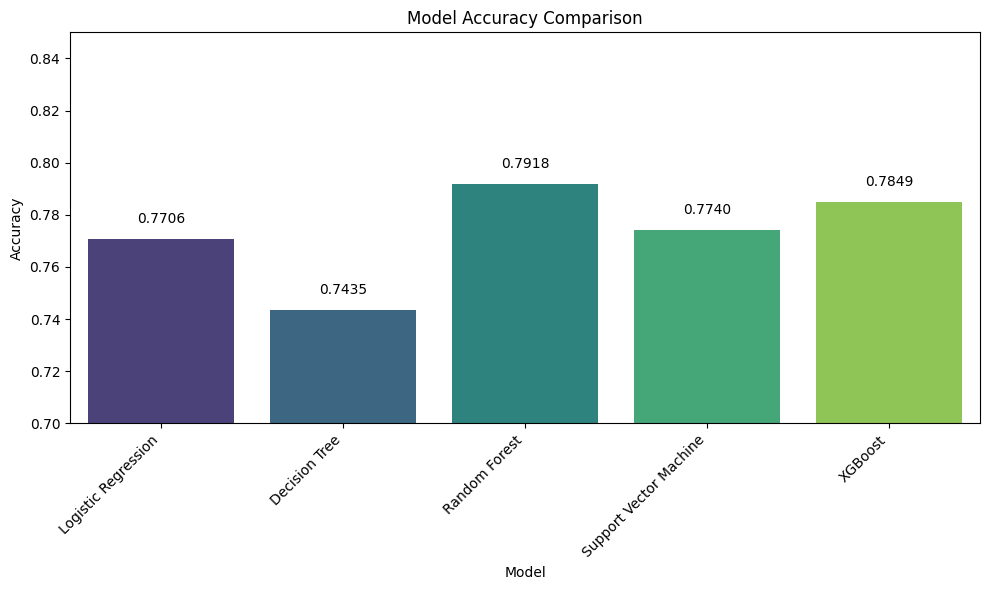

In [31]:
# a bar plot for model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.85) # Set y-axis limits for better visualization of differences
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(model_scores.values()):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [33]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Train/Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Define XGBoost model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Define parameter distribution for Randomized Search
param_dist = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5, 7]
}

# Randomized SearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,  # number of random combinations to try
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Best parameters and model
best_params = random_search.best_params_
print("🔥 Best Hyperparameters:", best_params)

# Predict using best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_val)

# Evaluation
print("\n📊 Tuned XGBoost Model Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
🔥 Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 1.0}

📊 Tuned XGBoost Model Evaluation:
Accuracy: 0.8131109833237493
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       863
           1       0.81      0.82      0.82       876

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:04:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Double-click (or enter) to edit

Selected Final Model: XGBoost Chosen for High accuracy ,Excellent generalization ,Robust handling of tabular data and Compatibility with tuning and feature importance extraction

Add blockquote

📊 Model Evaluation Achieved 81.3% accuracy on the validation set.

Model showed balanced precision and recall across both classes.

Evaluation Metrics:




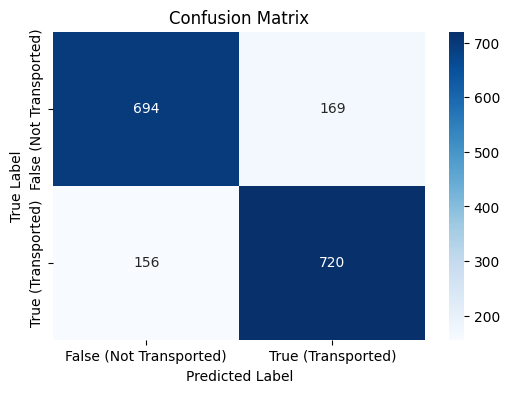

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
labels = ['False (Not Transported)', 'True (Transported)']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Precision/Recall: Balanced across both classes. • Confusion Matrix :High true positives and true negatives

Metric Precision and Recall • Moderate false positives, minimal false negatives

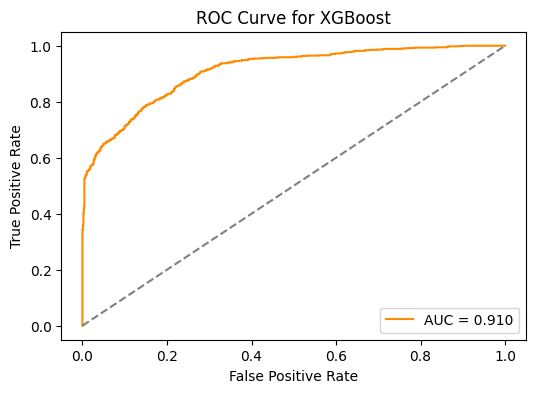

In [35]:
from sklearn.metrics import roc_curve, auc

y_scores = best_model.predict_proba(X_val)[:,1]
fpr, tpr, _ = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()


AUC Score: 0.910 (Excellent discriminatory ability)

The model generalizes well on unseen data

/tmp/ipython-input-36-628482087.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp[indices], y=features[indices], palette='viridis')


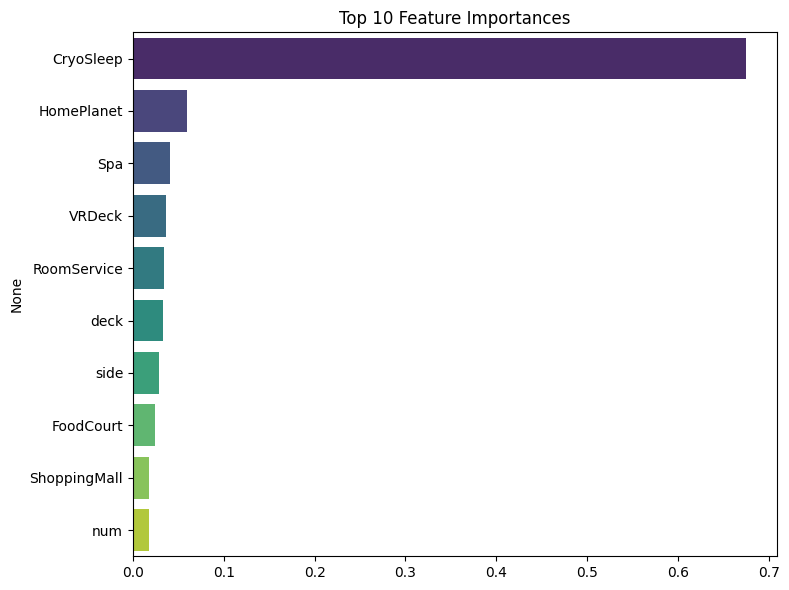

In [36]:
feat_imp = best_model.feature_importances_
features = X.columns
indices = np.argsort(feat_imp)[::-1][:10]  # top 10

plt.figure(figsize=(8,6))
plt.title("Top 10 Feature Importances")
sns.barplot(x=feat_imp[indices], y=features[indices], palette='viridis')
plt.tight_layout()
plt.show()


Feature Importance Analysis - Top 10 Most Influential Features • (XGBoost):CryoSleep – Strongest predictor of transport • HomePlanet, Spa, VRDeck – Reflect lifestyle/luxury factors • Cabin features – deck, side, and num also contributed • Spending categories – RoomService, ShoppingMall, etc.

Test Predictions & Submission Applied the trained model to the test set after identical preprocessing.

Created final submission file with PassengerId and Transported predictions.



In [52]:
# Load test data
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

# Apply the same preprocessing steps as training
def preprocess(df):
    df['Name'] = df['Name'].fillna('Unknown')
    df['CryoSleep'] = df['CryoSleep'].fillna(False)
    df['VIP'] = df['VIP'].fillna(False)
    df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
    df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Cabin'] = df['Cabin'].fillna('F/0/S')

    services = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    for col in services:
        df[col] = df[col].fillna(0)

    # Cabin Split
    df[['Deck','Num','Side']] = df['Cabin'].str.split('/', expand=True)

    # Drop unneeded columns
    df = df.drop(['Name', 'PassengerId', 'Cabin'], axis=1)

    # Encode categoricals
    df = pd.get_dummies(df, drop_first=True)

    return df

X_test = preprocess(test_df)

/tmp/ipython-input-52-849129199.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep'] = df['CryoSleep'].fillna(False)
/tmp/ipython-input-52-849129199.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VIP'] = df['VIP'].fillna(False)


In [53]:
# Align columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [41]:
X_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side
0,0,True,3,27.0,False,0.0,0.0,0.0,0.0,0.0,6,3,2
1,0,False,3,19.0,False,0.0,9.0,0.0,2823.0,0.0,5,4,2
2,1,True,0,31.0,False,0.0,0.0,0.0,0.0,0.0,2,0,2
3,1,False,3,38.0,False,0.0,6652.0,0.0,181.0,585.0,2,1,2
4,0,False,3,20.0,False,10.0,0.0,635.0,0.0,0.0,5,5,2


In [54]:
# Predict
y_pred = best_model.predict(X_test)

y_pred = y_pred.astype(bool)

In [55]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported': y_pred
})

submission.to_csv('submission.csv', index=False)
print("✅ Submission file created as 'submission.csv'")

✅ Submission file created as 'submission.csv'


In [56]:
import os

# List the contents of the mounted Google Drive directory
drive_path = '/content/drive/MyDrive/'
try:
    for dirname, _, filenames in os.walk(drive_path):
        for filename in filenames:
            if 'train.csv' in filename:
                print(os.path.join(dirname, filename))
except FileNotFoundError:
    print(f"The directory '{drive_path}' was not found. Please ensure your Google Drive is mounted correctly.")

/content/drive/MyDrive/train.csv
